### 웹크롤링

In [1]:
from bs4 import BeautifulSoup as bs
import requests

### selenium 설치
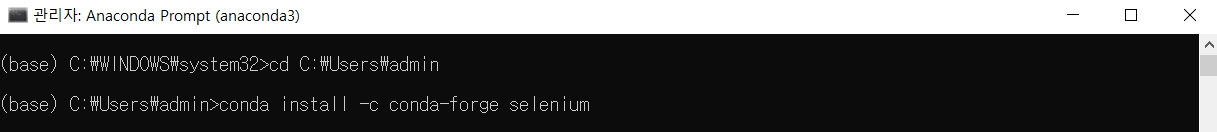

In [2]:
# 웹 드라이버 라이브러리
from selenium import webdriver

In [3]:
driver = webdriver.Chrome("C:/ChromeDriver_exe/chromedriver_102.exe")

C:\Users\admin\AppData\Local\Temp\ipykernel_8676\1652052964.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/ChromeDriver_exe/chromedriver_102.exe")


In [4]:
driver.get("https://www.naver.com")

In [5]:
html = driver.page_source
#html

In [6]:
# html 변수에 html 문서를 문자열로 지정
html = """
<html>
<head>
<title>테스트 페이지 입니다...</title>
</head>
    <body>
    <h1> 우리동네시장</h1>
        <div class = 'sale'>
            <p id='fruits1' class='fruits'>
                <span class = 'name'> 바나나 </span>
                <span class = 'price'> 3000원 </span>
                <span class = 'inventory'> 500개 </span>
                <span class = 'store'> 가나다상회 </span>
                <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
            </p>
        </div>
        <div class = 'prepare'>
            <p id='fruits2' class='fruits'>
                <span class ='name'> 파인애플 </span>
            </p>
        </div>
    </body>
</html>
"""
html

"\n<html>\n<head>\n<title>테스트 페이지 입니다...</title>\n</head>\n    <body>\n    <h1> 우리동네시장</h1>\n        <div class = 'sale'>\n            <p id='fruits1' class='fruits'>\n                <span class = 'name'> 바나나 </span>\n                <span class = 'price'> 3000원 </span>\n                <span class = 'inventory'> 500개 </span>\n                <span class = 'store'> 가나다상회 </span>\n                <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>\n            </p>\n        </div>\n        <div class = 'prepare'>\n            <p id='fruits2' class='fruits'>\n                <span class ='name'> 파인애플 </span>\n            </p>\n        </div>\n    </body>\n</html>\n"

In [7]:
# 문자열(변수 html)을 의미있는 값으로 구현
soup = bs(html, "html.parser")
soup


<html>
<head>
<title>테스트 페이지 입니다...</title>
</head>
<body>
<h1> 우리동네시장</h1>
<div class="sale">
<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="inventory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
</p>
</div>
<div class="prepare">
<p class="fruits" id="fruits2">
<span class="name"> 파인애플 </span>
</p>
</div>
</body>
</html>

### HTML 정보 찾기 -> 태그 이름 활용

In [8]:
# 태그 중에 span 이라는 이름을 가지는 모든 것 조회
# select의 결과는 리스트로 출력
soup.select("span")

[<span class="name"> 바나나 </span>,
 <span class="price"> 3000원 </span>,
 <span class="inventory"> 500개 </span>,
 <span class="store"> 가나다상회 </span>,
 <span class="name"> 파인애플 </span>]

In [9]:
soup.select("p")

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>,
 <p class="fruits" id="fruits2">
 <span class="name"> 파인애플 </span>
 </p>]

- 멤버들에 접근
    - id : #
    - class : .
    
    
- 자식을 호출 : >
- 자손을 호출 :  (space)

In [10]:
# id 속성의 값이 fruits1이 들어 있는 태그의 시작과 끝까지의 모든 태그 조회
soup.select("#fruits1")  

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>]

In [11]:
# class 이름이 price인 것을 조회
soup.select(".price")

[<span class="price"> 3000원 </span>]

In [12]:
# span 태그 중에 class 이름이 name 인 것을 조회
soup.select("span.name")

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]

In [13]:
soup.select("#fruits1 > span.name")

[<span class="name"> 바나나 </span>]

In [14]:
# 태그명이 div 이면서 class 이름이 sale인 태그의 자식 중에 아이디 이름이 fruits1인 
# 태그 밑에 있는 자식에 대한 태크명이 span이면서 클래스 이름이 name인 태그 모두 찾기

soup.select("div.sale > #fruits1 > span.name")


[<span class="name"> 바나나 </span>]

In [15]:
# 자손을 호출
soup.select("div.sale span.name")[0].text

' 바나나 '

In [16]:
# class의 key값을 가져와라
soup.select("div.sale span.name")[0]["class"]

['name']

In [17]:
# a 태그 조회
# a 태그의 href는 링크 정보
soup.select("a")[0]["href"]

'http://bit.ly/forPlaywithData'

#### 웹크롤링 사용시 주의사항
 - url 경로 뒤에 /robots.txt로 확인
 - 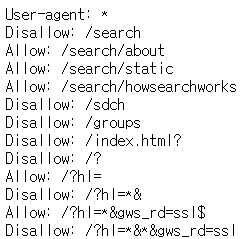

### 멜론 노래 순위 정보 크롤링

In [18]:
url = "http://www.melon.com/chart/index.htm"

In [19]:
driver = webdriver.Chrome("C:/ChromeDriver_exe/chromedriver_102.exe")
driver.get(url)
html = driver.page_source
#html

C:\Users\admin\AppData\Local\Temp\ipykernel_8676\2145615864.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/ChromeDriver_exe/chromedriver_102.exe")


In [76]:
soup = bs(html, "html.parser")
#soup

In [95]:
soup.select("div#wrap > div.clfix > div.my_fold >\
            div#conts > div#tb_list > form >\
            div.service_list_song > table > tbody > tr > td >\
            div.wrap > div.wrap_song_info > div.ellipsis")[0].text.replace("\n","")

'LOVE DIVE'

In [99]:
soup.select("div#wrap > div.clfix > div.my_fold >\
            div#conts > div#tb_list > form >\
            div.service_list_song > table > tbody > tr > td >\
            div.wrap > div.wrap_song_info > div.ellipsis.rank02 > a")[0].text

'IVE (아이브)'

In [104]:
soup.select("div#wrap > div.clfix > div.my_fold >\
            div#conts > div#tb_list > form >\
            div.service_list_song > table > tbody > tr > td >\
            div.wrap > div.wrap_song_info > div.ellipsis")[2].text

'\nLOVE DIVE\n'

In [103]:
import pandas as pd

list_rank = []
for i in range(1, 11, 1):
    list_rank.append(i)

list_song = []
for i in range(0, 30, 3):
    # print("곡이름 : ", soup.select("div#wrap > div.clfix > div.my_fold >\
    #         div#conts > div#tb_list > form >\
    #         div.service_list_song > table > tbody > tr > td >\
    #         div.wrap > div.wrap_song_info > div.ellipsis")[i].text)
    list_song.append(soup.select("div#wrap > div.clfix > div.my_fold >\
            div#conts > div#tb_list > form >\
            div.service_list_song > table > tbody > tr > td >\
            div.wrap > div.wrap_song_info > div.ellipsis")[i].text.replace("\n",""))
list_song

list_singer = []
for i in range(0, 10, 1):
    # print("가수명: ", soup.select("div#wrap > div.clfix > div.my_fold >\
    #         div#conts > div#tb_list > form >\
    #         div.service_list_song > table > tbody > tr > td >\
    #         div.wrap > div.wrap_song_info > div.ellipsis")[i].text)
    list_singer.append(soup.select("div#wrap > div.clfix > div.my_fold >\
            div#conts > div#tb_list > form >\
            div.service_list_song > table > tbody > tr > td >\
            div.wrap > div.wrap_song_info > div.ellipsis.rank02 > a")[i].text)
list_singer

list_album = []
for i in range(2, 30, 3):
    # print("앨범명: ", soup.select("div#wrap > div.clfix > div.my_fold >\
    #         div#conts > div#tb_list > form >\
    #         div.service_list_song > table > tbody > tr > td >\
    #         div.wrap > div.wrap_song_info > div.ellipsis")[i].text)
    list_album.append(soup.select("div#wrap > div.clfix > div.my_fold >\
            div#conts > div#tb_list > form >\
            div.service_list_song > table > tbody > tr > td >\
            div.wrap > div.wrap_song_info > div.ellipsis")[i].text.replace("\n",""))
list_album


df = pd.DataFrame({"순위" : list_rank, "곡이름" : list_song, "가수명" : list_singer, "앨범명" : list_album})
df

,순위,곡이름,가수명,앨범명
0,1,LOVE DIVE,IVE (아이브),LOVE DIVE
1,2,TOMBOY,(여자)아이들,I NEVER DIE
2,3,That That (prod. & feat. SUGA of BTS),싸이 (PSY),싸다9
3,4,사랑인가 봐,멜로망스,사랑인가 봐 (사내맞선 OST 스페셜 트랙)
4,5,우리들의 블루스,임영웅,IM HERO
5,6,사랑은 늘 도망가,임영웅,신사와 아가씨 OST Part.2
6,7,Yet To Come,방탄소년단,Proof
7,8,정이라고 하자 (Feat. 10CM),BIG Naughty (서동현),정이라고 하자
8,9,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life)
9,10,다시 만날 수 있을까,임영웅,IM HERO
